<a href="https://colab.research.google.com/github/1bin01/Machine-Learning/blob/main/Introduction-to-Machine-Learning/Cp3_Unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn
!pip install --upgrade joblib==1.1.0
!pip install -q --upgrade scikit-learn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

from importlib import reload  # plt 다시 그릴 때
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 경고 제거 (없어도 문제는 x)

# 나눔 포트 설정 (런타임 다시 시작 해줘야됨!)
import matplotlib as mpl
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')
mpl.rc('axes', unicode_minus=False)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 di

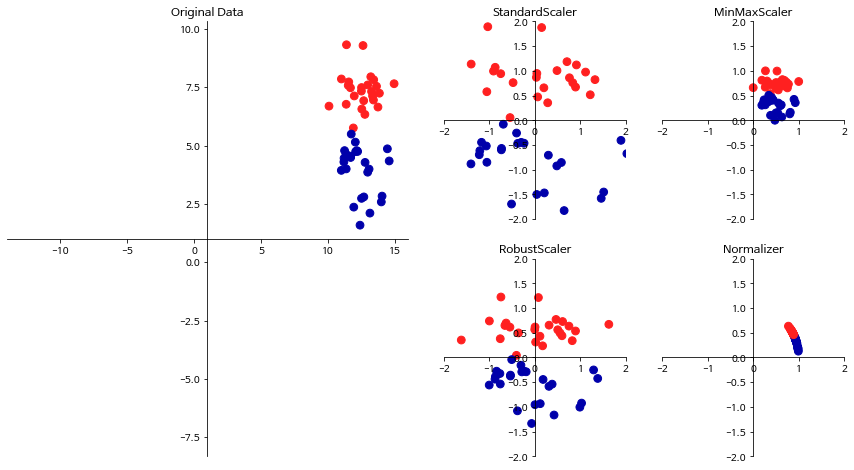

In [2]:
# 데이터 전처리 : 스케일 조정
mglearn.plots.plot_scaling()

In [3]:
# 유방암 데이터에 데이터 변환 적용하기

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
# MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

print("변환된 데이터의 크기 :", X_train_scaled.shape)
print("조정 전 특성의 최솟값 :\n", X_train.min(axis = 0))
print("조정 후 특성의 최솟값 :\n", X_train_scaled.min(axis = 0))
print("조정 전 특성의 최댓값 :\n", X_train.max(axis = 0))
print("조정 후 특성의 최댓값 :\n", X_train_scaled.max(axis = 0))

변환된 데이터의 크기 : (426, 30)
조정 전 특성의 최솟값 :
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
조정 후 특성의 최솟값 :
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
조정 전 특성의 최댓값 :
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
조정 후 특성의 최댓값 :
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [5]:
# train data와 같은 변환을 적용해야함(최소 최대가 0 1이 아닐 수 있음)

X_test_scaled = scaler.transform(X_test)
print("조정 후 특성의 최솟값:\n", X_test_scaled.min(axis = 0))
print("조정 후 특성의 최댓값:\n", X_test_scaled.max(axis = 0))

조정 후 특성의 최솟값:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
조정 후 특성의 최댓값:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


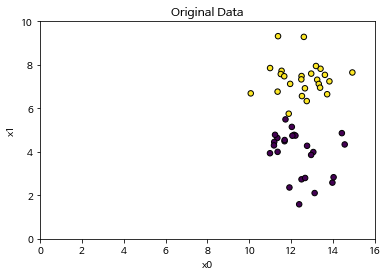

In [6]:
# QuantileTransformer
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

X, y = make_blobs(n_samples = 50, centers = 2, random_state = 4, cluster_std = 1)
X += 3

plt.scatter(X[:, 0], X[:, 1], c = y, s = 30, edgecolors = 'black')
plt.xlim(0, 16)
plt.xlabel('x0')
plt.ylim(0, 10)
plt.ylabel('x1')
plt.title("Original Data")
plt.show()

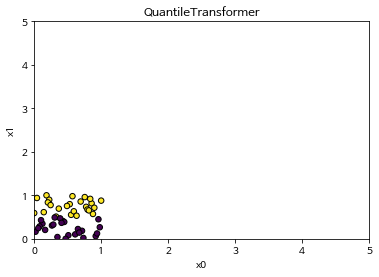

In [7]:
scaler = QuantileTransformer(n_quantiles = 50)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c = y, s = 30, edgecolors = 'black')
plt.xlim(0, 5)
plt.xlabel('x0')
plt.ylim(0, 5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

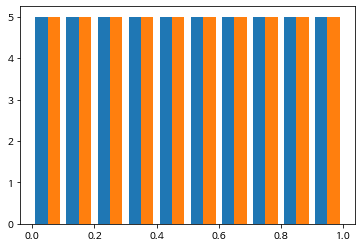

In [8]:
plt.hist(X_trans)
plt.show()

In [9]:
print(scaler.quantiles_.shape)

(50, 2)


In [10]:
x = np.array([[0], [5], [8], [9], [10]])
print(np.percentile(x[:, 0], [0, 25, 50, 75, 100]))

x_trans = QuantileTransformer(n_quantiles = 5).fit_transform(x)
print(np.percentile(x_trans[:, 0], [0, 25, 50, 75, 100]))

[ 0.  5.  8.  9. 10.]
[0.   0.25 0.5  0.75 1.  ]


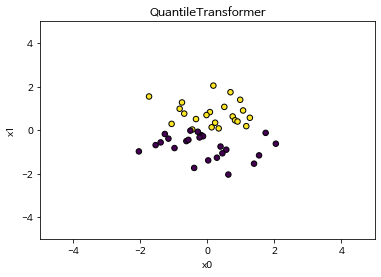

In [11]:
# output을 정규 분포(normal)로 바꾸기

scaler = QuantileTransformer(output_distribution = 'normal', n_quantiles = 50)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c = y, s = 30, edgecolors = 'black')
plt.xlim(-5, 5)
plt.xlabel('x0')
plt.ylim(-5, 5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

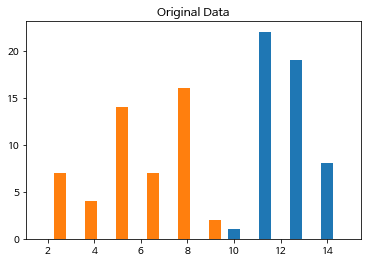

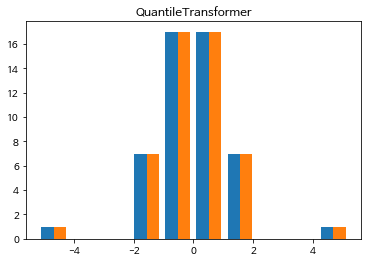

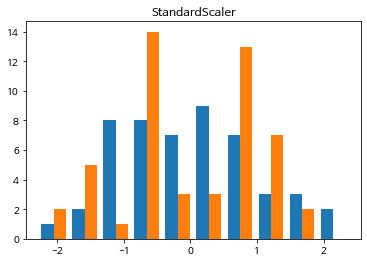

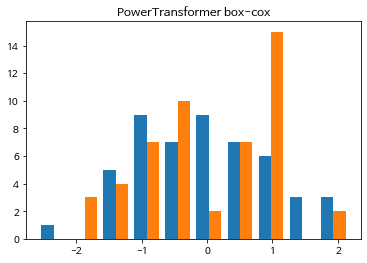

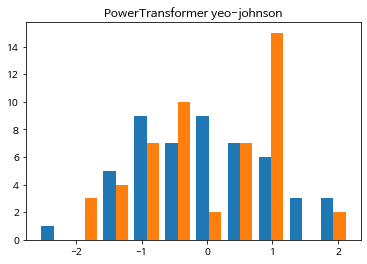

In [12]:
plt.hist(X)
plt.title('Original Data')
plt.show()

X_trans = QuantileTransformer(n_quantiles = 50, output_distribution = 'normal').fit_transform(X)
plt.hist(X_trans)
plt.title('QuantileTransformer')
plt.show()

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('StandardScaler')
plt.show()

X_trans = PowerTransformer(method = 'box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer box-cox')
plt.show()

X_trans = PowerTransformer(method = 'yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer yeo-johnson')
plt.show()

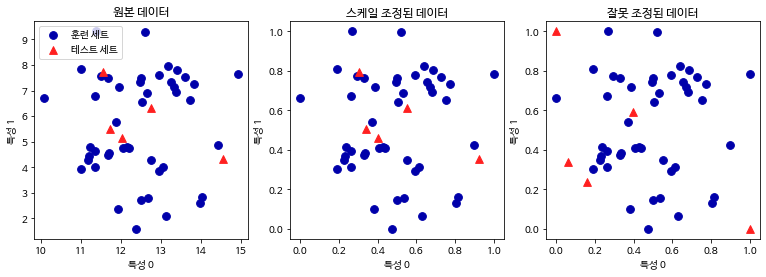

In [13]:
# train set과 test set에 다른 변환을 적용하면..

X_train, X_test = train_test_split(X, random_state = 5, test_size = .1)

fig, axes = plt.subplots(1, 3, figsize = (13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c = mglearn.cm2.colors[0], label = "훈련 세트", s = 60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker = '^', c = mglearn.cm2.colors[1], label = "테스트 세트", s = 60)
axes[0].legend(loc = 'upper left')
axes[0].set_title("원본 데이터")

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c = mglearn.cm2.colors[0], label = "훈련 세트", s = 60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker = '^', c = mglearn.cm2.colors[1], label = "테스트 세트", s = 60)
axes[1].set_title("스케일 조정된 데이터")

test_scaler = MinMaxScaler()
X_test_scaled_badly = test_scaler.fit_transform(X_test)

axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c = mglearn.cm2.colors[0], label = "training set", s = 60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker = '^', c = mglearn.cm2.colors[1], label = "test set", s = 60)
axes[2].set_title("잘못 조정된 데이터")

for ax in axes:
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")

In [14]:
# SVC에서 데이터 전처리(MinMaxScaler)의 효과
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

svm = SVC(gamma = 'auto')
svm.fit(X_train, y_train)
print("test set의 정확도 : {:.2f}" .format(svm.score(X_test, y_test)))

scaler = MinMaxScaler().fit(X_test)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm.fit(X_train_scaled, y_train)
print("test set의 정확도 : {:.2f}" .format(svm.score(X_test_scaled, y_test)))

test set의 정확도 : 0.63
test set의 정확도 : 0.95


In [15]:
# StandardScaler 써보기(평균 0, 분산 1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm.fit(X_train_scaled, y_train)
print("test set의 정확도 : {:.2f}" .format(svm.score(X_test_scaled, y_test)))

test set의 정확도 : 0.97


## 3.4 차원 축소, 특성 추출, 매니폴드 학습

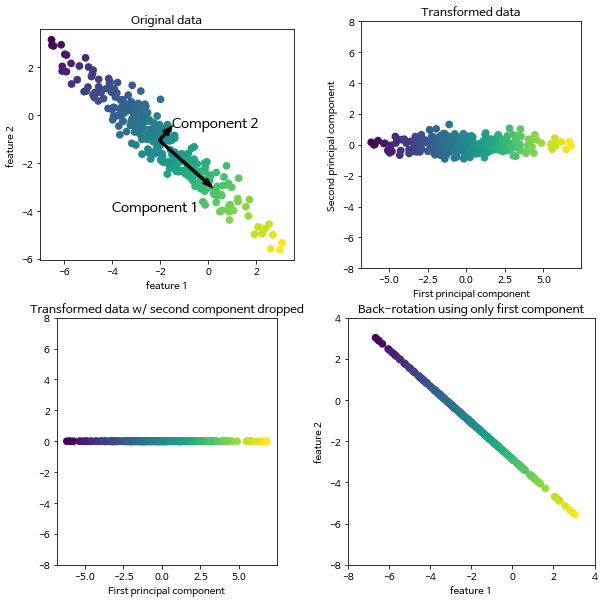

In [16]:
# 주성분 분석(PCA) - 차원 축소의 용도로 사용할 수 있음

mglearn.plots.plot_pca_illustration()

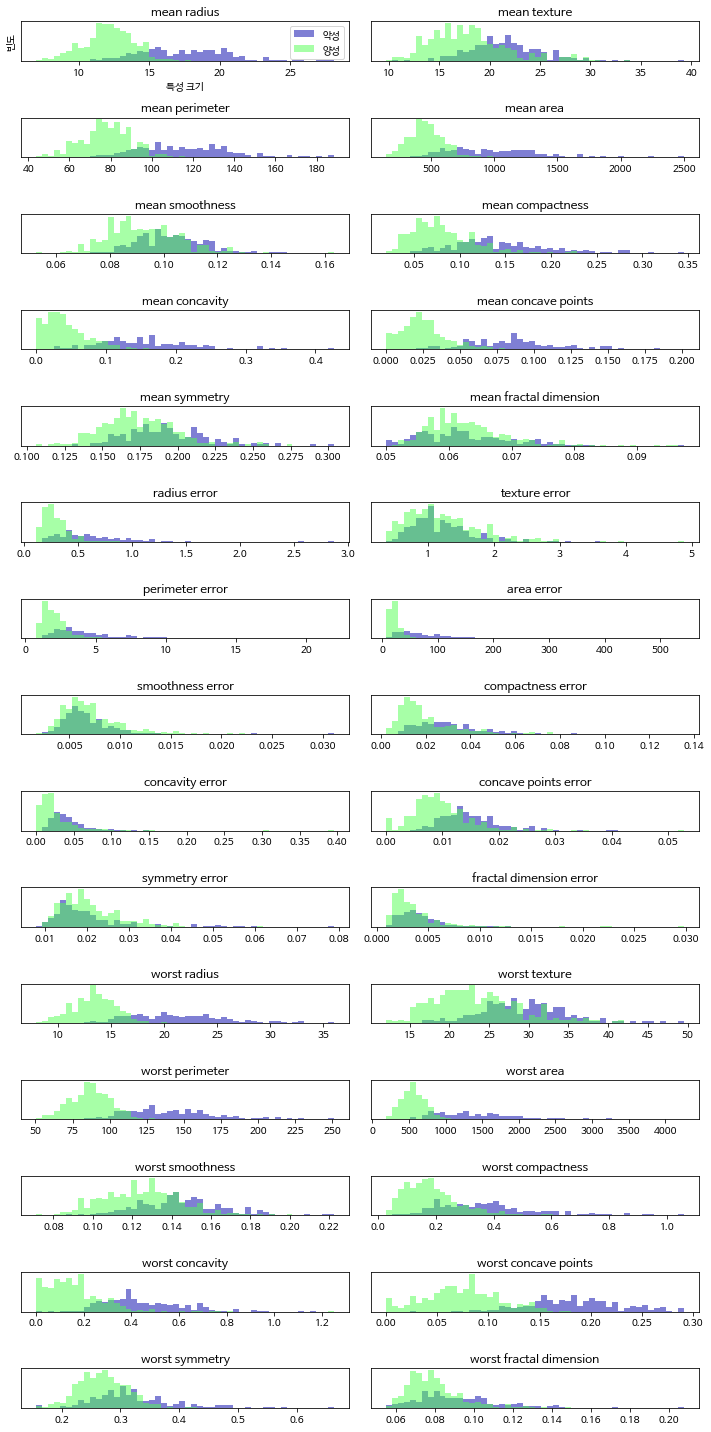

In [17]:
# 고차원 데이터셋의 시각화 (유방암 데이터 셋에 적용하기)

fig, axes = plt.subplots(15, 2, figsize = (10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins = 50)
    ax[i].hist(malignant[:, i], bins = bins, color = mglearn.cm3(0), alpha = .5)
    ax[i].hist(benign[:, i], bins = bins, color = mglearn.cm3(2), alpha = .5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성", "양성"], loc="best")
fig.tight_layout()

In [23]:
# PCA 적용하기(상호작용을 찾아낼 수 있다는 장점이 있음) - 2개의 주성분으로 축소

scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer.data)

from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("원본 데이터 형태 :", X_scaled.shape)
print("축소된 데이터 형태 :", X_pca.shape)

원본 데이터 형태 : (569, 30)
축소된 데이터 형태 : (569, 2)


Text(0, 0.5, '두 번째 주성분')

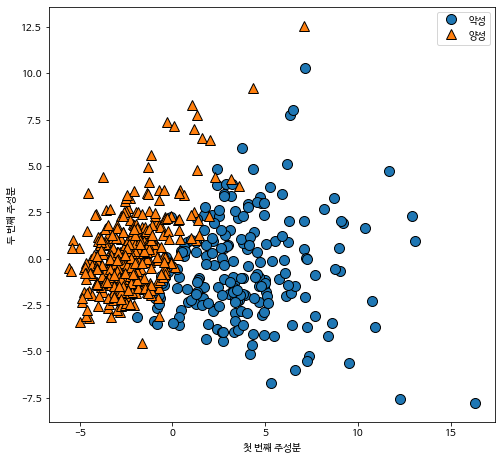

In [24]:
plt.figure(figsize = (8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["악성", "양성"], loc = "best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

In [26]:
# 그래프의 축을 해석하기 어려움(여러 특성이 조합된 상태)
print("PCA 주성분 형태:", pca.components_.shape)
print("PCA 주성분:\n", pca.components_)

PCA 주성분 형태: (2, 30)
PCA 주성분:
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, '주성분')

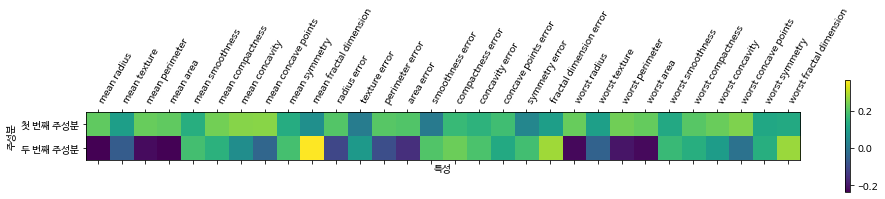

In [27]:
plt.matshow(pca.components_, cmap = 'viridis')
plt.yticks([0, 1], ["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation = 60, ha = 'left')
plt.xlabel("특성")
plt.ylabel("주성분")

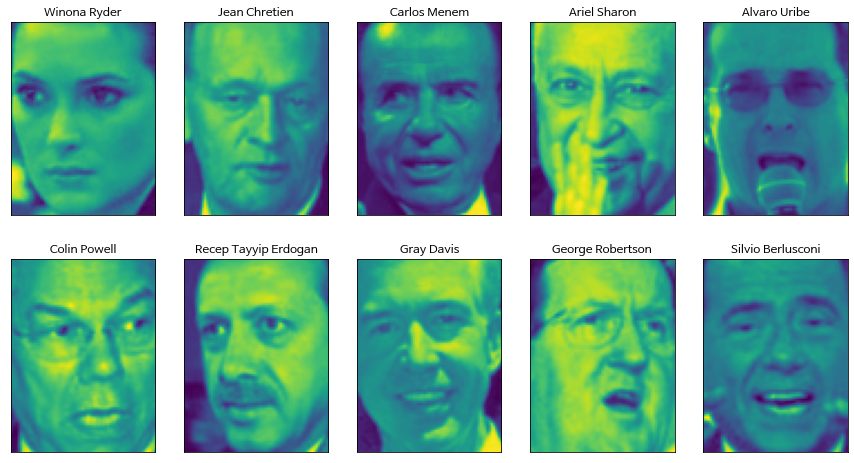

In [28]:
# 고유얼굴의 특성 추출

from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize = (15, 8), subplot_kw = {'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [33]:
print("people shape :", people.images.shape)
print("class 개수:", len(people.target_names))\

counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25}{1:3}" .format(name, count), end = '    ')
    if(i % 3 == 2) :
      print()

people shape : (3023, 87, 65)
class 개수: 62
Alejandro Toledo          39    Alvaro Uribe              35    Amelie Mauresmo           21    
Andre Agassi              36    Angelina Jolie            20    Ariel Sharon              77    
Arnold Schwarzenegger     42    Atal Bihari Vajpayee      24    Bill Clinton              29    
Carlos Menem              21    Colin Powell             236    David Beckham             31    
Donald Rumsfeld          121    George Robertson          22    George W Bush            530    
Gerhard Schroeder        109    Gloria Macapagal Arroyo   44    Gray Davis                26    
Guillermo Coria           30    Hamid Karzai              22    Hans Blix                 39    
Hugo Chavez               71    Igor Ivanov               20    Jack Straw                28    
Jacques Chirac            52    Jean Chretien             55    Jennifer Aniston          21    
Jennifer Capriati         42    Jennifer Lopez            21    Jeremy Greenstock   

In [38]:
mask = np.zeros(people.target.shape, dtype = bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.

# 1-최근접 이웃 분류기로 얼굴 인식하기
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify = y_people, random_state = 0)
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
print("1-최근접 이웃 분류기의 test set 점수 : {:.2f}" .format(knn.score(X_test, y_test)))

1-최근접 이웃 분류기의 test set 점수 : 0.23


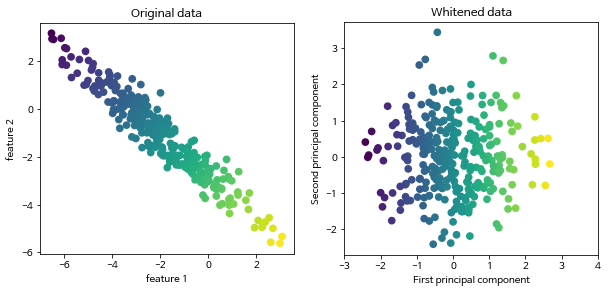

In [39]:
# PCA 화이트닝 - 주성분의 스케일이 같아지도록 하는 옵션
mglearn.plots.plot_pca_whitening()

In [42]:
# PCA를 이용해 주성분에서의 거리를 사용해 성능 개선하기
pca = PCA(n_components = 100, whiten = True, random_state = 0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca shape :", X_train_pca.shape)
knn.fit(X_train_pca, y_train)
print("test set 정확도 : {:.2f}" .format(knn.score(X_test_pca, y_test)))

X_train_pca shape : (1547, 100)
test set 정확도 : 0.31


pca components shape : (100, 5655)


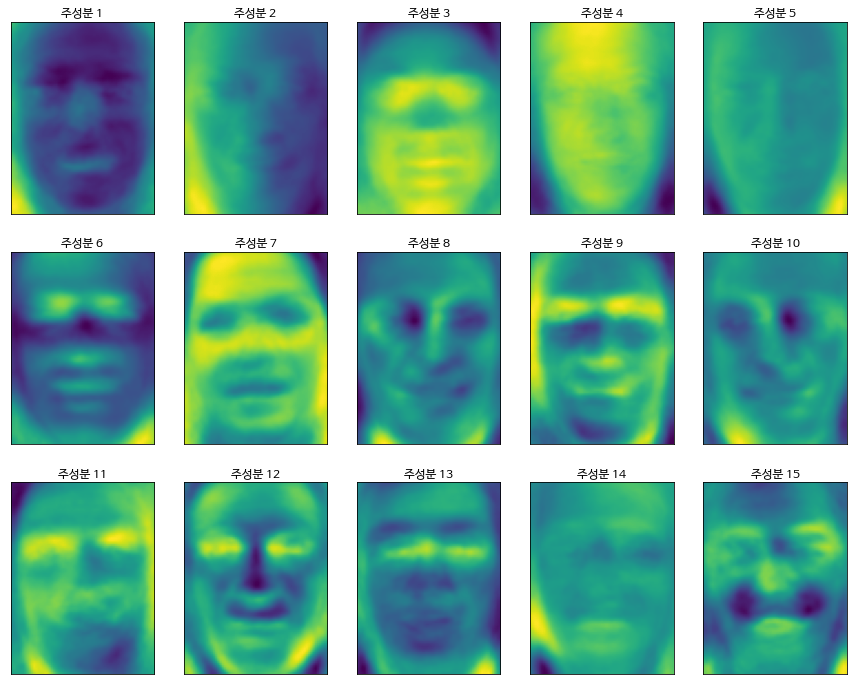

In [43]:
print("pca components shape :", pca.components_.shape)

fig, axes = plt.subplots(3, 5, figsize = (15, 12), subplot_kw = {'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap = 'viridis')
    ax.set_title("주성분 {}".format((i + 1)))

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 5.2s, 0.1min


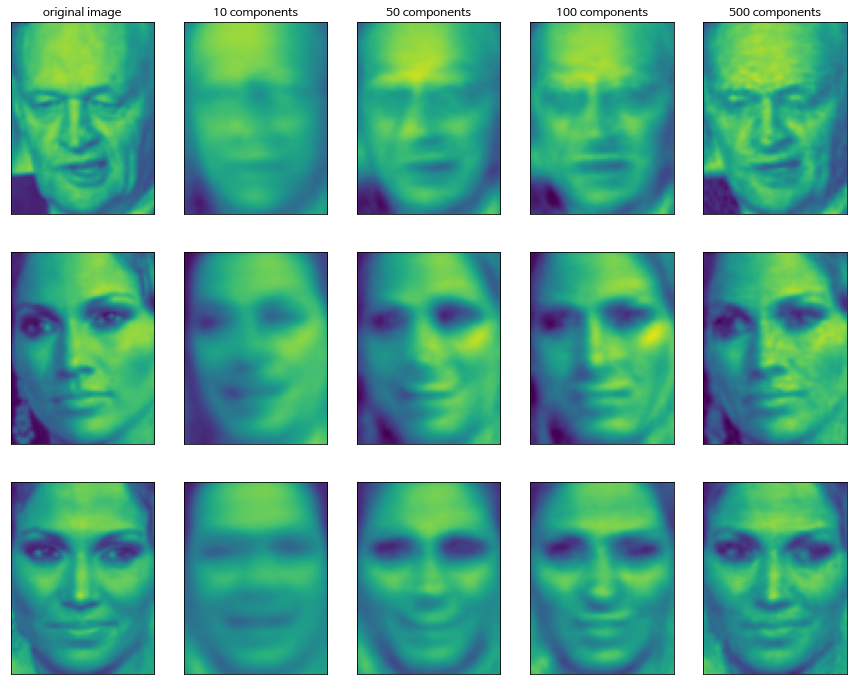

In [44]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

## 3.4.2 비음수 행렬 분해(NMF)